In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/output/dataset.csv'

In [ ]:
df = pd.read_csv(dataset_path)

In [ ]:
df

,sector,pmc,ccmc,ap,bps,ac,ingpc_mean
0,Abel Gilbert,341.420856,0.000000e+00,3000.000000,1.866667,0.0,186.582404
1,Acacias,507.023203,0.000000e+00,245.000000,2.200000,1.0,297.917603
2,Alborada,819.085921,4.157044e-06,389.192825,2.066910,113.0,422.237240
3,Argelia,435.426671,4.232569e-07,1660.279070,2.155340,9.0,191.006255
4,Atarazana,857.244304,1.251978e-06,617.601790,2.236542,19.0,553.194133
...,...,...,...,...,...,...,...
56,Sauces,686.392528,9.823048e-07,295.268797,2.230769,10.0,364.891111
57,Solanda,517.208887,2.739629e-06,451.052632,2.456140,3.0,234.612433
58,Turubamba,542.188739,1.692989e-06,540.645161,2.450331,4.0,270.232101
59,Urdenor,936.585279,7.700748e-06,401.451220,2.317406,12.0,434.587815


In [ ]:
X = df.iloc[:,1:7]

In [ ]:
X

,pmc,ccmc,ap,bps,ac,ingpc_mean
0,341.420856,0.000000e+00,3000.000000,1.866667,0.0,186.582404
1,507.023203,0.000000e+00,245.000000,2.200000,1.0,297.917603
2,819.085921,4.157044e-06,389.192825,2.066910,113.0,422.237240
3,435.426671,4.232569e-07,1660.279070,2.155340,9.0,191.006255
4,857.244304,1.251978e-06,617.601790,2.236542,19.0,553.194133
...,...,...,...,...,...,...
56,686.392528,9.823048e-07,295.268797,2.230769,10.0,364.891111
57,517.208887,2.739629e-06,451.052632,2.456140,3.0,234.612433
58,542.188739,1.692989e-06,540.645161,2.450331,4.0,270.232101
59,936.585279,7.700748e-06,401.451220,2.317406,12.0,434.587815


In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(X)

StandardScaler()

In [ ]:
X_norm = sc.transform(X)

In [ ]:
X_norm

array([[-1.23847676, -0.90422377,  0.11469895, -1.28403767, -0.26073987,
        -0.77738662],
       [-0.59247294, -0.90422377, -0.24218068, -0.591956  , -0.25402884,
        -0.15765236],
       [ 0.6248631 ,  1.23379663, -0.2235021 , -0.8682835 ,  0.49760609,
         0.53435824],
       [-0.87176629, -0.68653737, -0.05884701, -0.68468151, -0.20034063,
        -0.75276178],
       [ 0.77371643, -0.26031586, -0.19391426, -0.51608669, -0.13323037,
         1.26331435],
       [-1.51696297, -0.68443817,  0.07819254,  1.05377349, -0.25402884,
        -0.82025311],
       [-0.41441696, -0.90422377, -0.22904174,  0.84030114, -0.24060679,
        -0.79885626],
       [ 1.35946427, -0.49533645, -0.22149035, -1.08538235,  0.5512943 ,
         0.28510471],
       [-0.12007042, -0.10316135, -0.22379612,  0.05227804, -0.26073987,
         1.71544899],
       [ 0.38093864, -0.37666868, -0.21044365,  1.14325324, -0.1667855 ,
         0.82305281],
       [ 0.29135783,  0.03809822, -0.18735335,  0.

In [ ]:
clusters = np.arange(2,11)

In [ ]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [ ]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

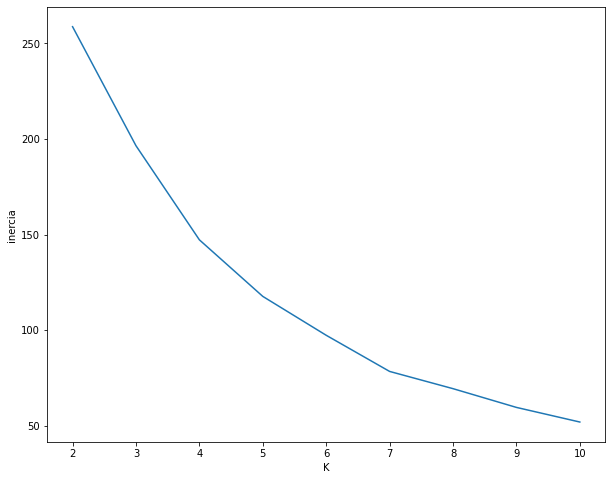

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.lineplot(data = eva, x = "K", y = "inercia")

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.fit(X_norm)

KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[-0.18350999, -0.32061594, -0.17262565,  0.03368389, -0.18428681,
        -0.21800264],
       [ 3.26050042,  0.70826289, -0.19886308, -1.26568875,  7.11467789,
         4.17792577],
       [-1.18590885,  0.02253481,  5.24443884,  1.9304858 , -0.26073987,
        -0.67278859],
       [ 1.21004665,  2.22829717, -0.21230091, -0.61616586,  0.40077557,
         1.18368373]])

In [ ]:
df["cluster"] = kmeans.labels_

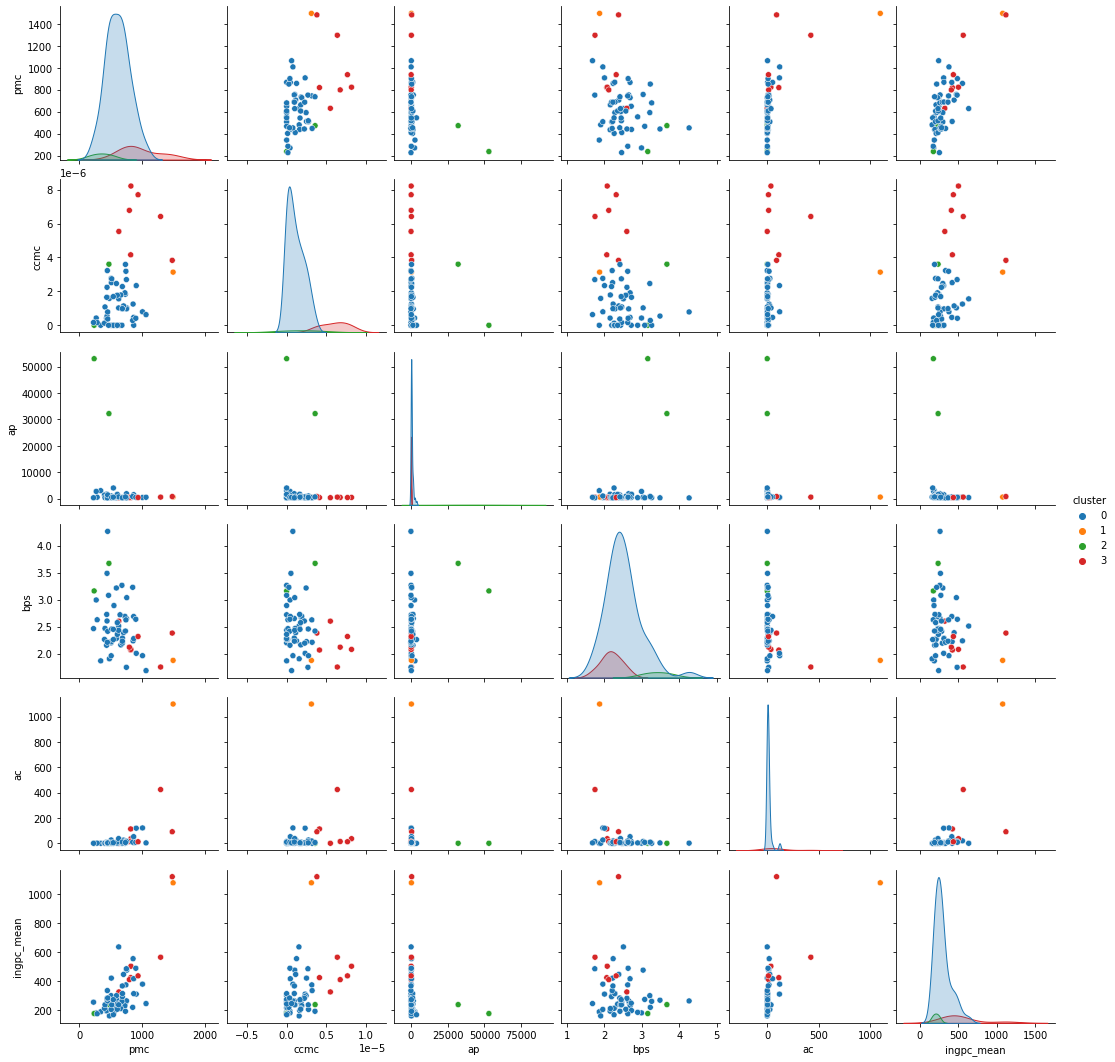

In [ ]:
_ = sns.pairplot(df,hue="cluster", palette="tab10")

In [ ]:
_ = sns.boxplot(data=df,hue='cluster')

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

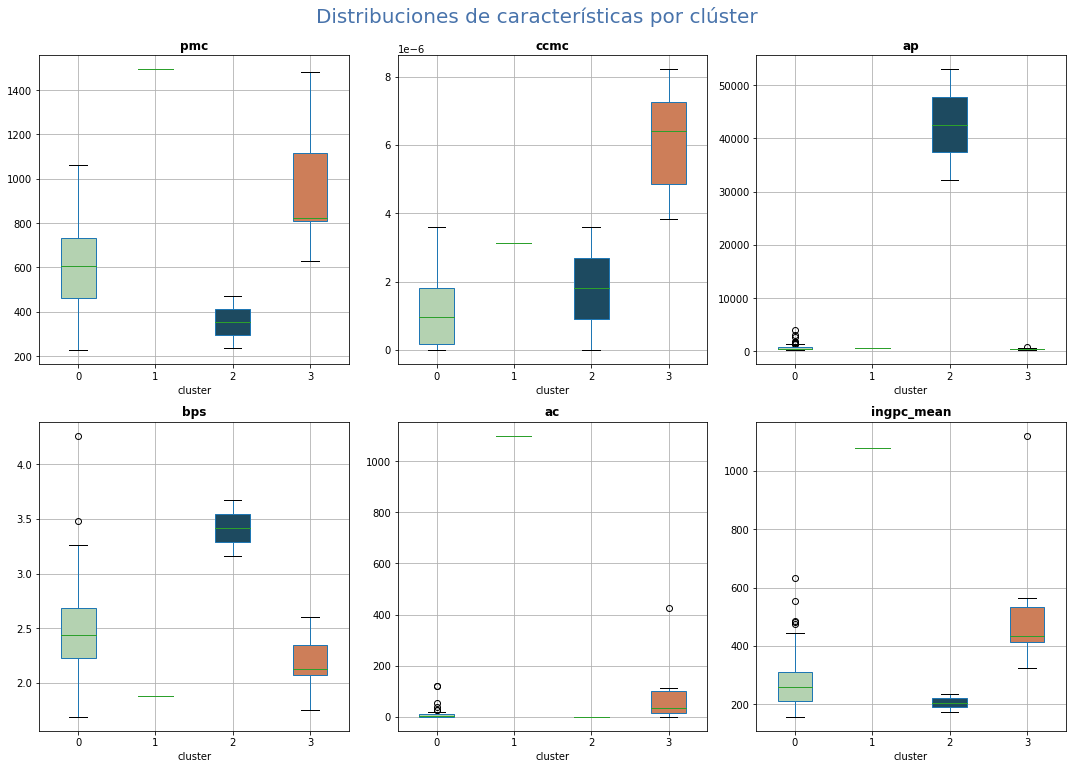

In [ ]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
features = X.columns
ncols = 3
nrows = 3
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = df[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        _ = ax.set_xlabel('cluster')
        _ = ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

_ = fig.suptitle('Distribuciones de características por clúster',fontsize=20,  color= '#4873ab',y=1.02)   
_ = plt.tight_layout()
_ = plt.show()

2

Index(['pmc', 'ccmc', 'ap', 'bps', 'ac', 'ingpc_mean'], dtype='object')

In [ ]:
#Con las distribuciones de los clusteres podemos llegar a varias conclusiones con los 4 grupos formados.
#En el grupo 0 podemos observar a los sectores entre bajo y mediano ingpc_mean, y en la mayoria del resto de caracteristicas poseen los valores mas bajos; tambien se puede observar
#como este grupo esta compuesta por un gran numero de observaciones; por lo que podemos decir que este grupo pertenece a sectores populares o medio/bajo
#En el grupo 2 podemos destacar observaciones que tienen niveles de ingpc_mean bajos, y de igual manera con el resto de sus caracteristicas, por lo que podriamos decir que 
#este grupo pertenece a sectores de bajos recursos
#En el grupo 1 y 3 podemos destacar que la mayor parte de sus observaciones tienen un ingpc_mean entre medio y alto, y de igual manera una gran parte del resto de caracteristicas; tambien cabe destacar, que la cantidad de observaciones 
# en este grupo es baja; por lo que podemos decir que los sectores que pertenecen a este grupo son de nivel medio/alto economico

Estatus
- popular -> 0
- bajos recursos -> 2
- medio/alto -> 1,3

In [ ]:
df.loc[df['cluster']==0]

,sector,pmc,ccmc,ap,bps,ac,ingpc_mean,cluster
0,Abel Gilbert,341.420856,0.000000e+00,3000.000000,1.866667,0.0,186.582404,0
1,Acacias,507.023203,0.000000e+00,245.000000,2.200000,1.0,297.917603,0
3,Argelia,435.426671,4.232569e-07,1660.279070,2.155340,9.0,191.006255,0
4,Atarazana,857.244304,1.251978e-06,617.601790,2.236542,19.0,553.194133,0
5,Bastion Popular,270.031230,4.273385e-07,2718.181818,2.992647,1.0,178.881442,0
6,Batallon del Suburbio,552.667652,0.000000e+00,346.428571,2.889831,3.0,182.725384,0
7,Belisario Quevedo,1007.400099,7.950170e-07,404.722910,1.962347,121.0,377.458867,0
8,Bellavista,628.123055,1.557540e-06,386.923077,2.510288,0.0,634.420078,0
9,Carcelen,756.556160,1.025748e-06,490.000000,3.035744,14.0,474.101191,0
10,Centro Historico,733.592221,1.832197e-06,668.250000,2.671958,9.0,245.850268,0


In [ ]:
df.loc[df['cluster']==1]

,sector,pmc,ccmc,ap,bps,ac,ingpc_mean,cluster
28,Iñaquito,1494.728563,0.000003,579.398408,1.875504,1099.0,1076.803788,1


In [ ]:
df.loc[df['cluster']==2]

,sector,pmc,ccmc,ap,bps,ac,ingpc_mean,cluster
20,Floresta,472.778640,0.000004,32200.0,3.669811,0.0,236.217251,2
25,Guasmo Sur - La Union,237.014518,0.000000,53000.0,3.160000,0.0,174.529610,2


In [ ]:
df.loc[df['cluster']==3]

,sector,pmc,ccmc,ap,bps,ac,ingpc_mean,cluster
2,Alborada,819.085921,0.000004,389.192825,2.066910,113.0,422.237240,3
22,Garzota,822.804233,0.000008,436.978764,2.079104,36.0,501.099975,3
26,Guayacanes,630.630427,0.000006,335.000000,2.601336,0.0,323.577663,3
27,Huancavilca Norte,798.033532,0.000007,433.480000,2.120000,14.0,408.422167,3
33,La Paz,1480.977081,0.000004,774.017833,2.380783,91.0,1119.027545,3
38,Mariscal Sucre,1295.562949,0.000006,559.517491,1.752837,424.0,563.267094,3
59,Urdenor,936.585279,0.000008,401.451220,2.317406,12.0,434.587815,3


In [ ]:
df.to_csv('/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/output/dataset_with_clusters.csv', index=False)